# EO-HARVEST
## Demonstration with Ifremer Opensearch Service

Ifremer Opensearch service (https://opensearch.ifremer.fr) allows to search and select Satellite and In Situ data over space and time criteria. At this stage, it is still in test mode, available internally only. No account is required.

In [1]:
# import eo-harvest package
import eo_harvest

# and other stuff
import datetime
import shapely.geometry


### Simple search
Searching granule files for a dataset using time and space criteria. Let's search for instance Ifremer Argo dataset, whose id is `argo`.


In [2]:
# define search area as shapely geometry (here a simple rectangular box)
area = shapely.geometry.box(-50, -20, -20, 20)

# define search time frame
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 1, 2)

# performs the search
# first args is the data store, here `Ifremer`
res = eo_harvest.search_granule(
    'Ifremer',
    'argo',
    start,
    end,
    area,
)


## Inspecting the result

We get in ``res`` variable the list of granules, with their properties, that were returned by the query. A few operations can be done on these results.

### Display result footprints

It is possible to display the location of these found granules using ``plot`` function:

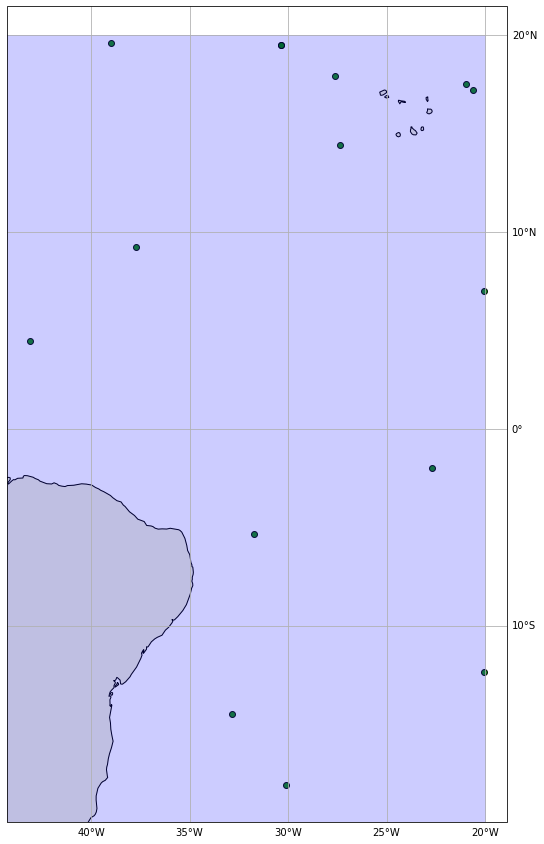

In [3]:
# display the location of found granules
eo_harvest.plot(res, clip=area)

### Description of the returned granules

The properties of the returned granules can be inspected, just printing the returned granule objects:

In [4]:
# display the details of the first granule in the returned list
print(res.items[0])

R7900561_025.nc
   start: 2020-01-01 07:16:15
   end: 2020-01-01 07:16:15
   footprint: POINT (-20.95829 17.49685)
   url: ftp://ftp.ifremer.fr/ifremer/argo/dac/coriolis/7900561/profiles/R7900561_025.nc




In [5]:
# print the name and URL of all found granules
for c in res.items:
    print(c.name, c.url)

R7900561_025.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/coriolis/7900561/profiles/R7900561_025.nc
R6901625_171.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/coriolis/6901625/profiles/R6901625_171.nc
R3901933_080.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/coriolis/3901933/profiles/R3901933_080.nc
R3901921_060.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/coriolis/3901921/profiles/R3901921_060.nc
D1901731_162.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/aoml/1901731/profiles/D1901731_162.nc
R7900559_025.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/coriolis/7900559/profiles/R7900559_025.nc
R6902797_025.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/coriolis/6902797/profiles/R6902797_025.nc
R3902245_003.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/aoml/3902245/profiles/R3902245_003.nc
R3902235_014.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/aoml/3902235/profiles/R3902235_014.nc
R1902184_303.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/aoml/1902184/profiles/R1902184_303.nc
R3901242_108.nc ftp://ftp.ifremer.fr/ifremer/argo/dac/ao

## Quicklook

Quicklooks are currently not available on Ifremer store.

## Download

Each returned granule (in ``res.items`` list) can be downloaded (``wget`` is used behind the scene), calling the ``download`` method on the granule to download. Main argument, ``mystore`` is the root folder where to save the downloaded granule: it will be saved in a subfolder ``<store>/<product identifier>/<year>/<day>/``. 

In [6]:
res.items[2].download(mystore='.', silent=False)

Downloading: ftp://ftp.ifremer.fr/ifremer/argo/dac/coriolis/3901933/profiles/R3901933_080.nc to Ifremer/argo/2020/001/R3901933_080.nc


True

## Another example with Satellite data

Currently a few satellite products can be sought for, such as CFOSAT SWIM data (``cersat_naiad_swi_l2anad``).


In [7]:
# define search area as shapely geometry (here a simple rectangular box)
area = shapely.geometry.box(-50, -20, -20, 20)

# define search time frame
start = datetime.datetime(2020, 4, 1)
end = datetime.datetime(2020, 4, 3)

# performs the search
# first args is the data store, here `Ifremer`
res = eo_harvest.search_granule(
    'Ifremer',
    'cersat_naiad_swi_l2anad',
    start,
    end,
    area,
)


In [8]:
# print the name and URL of all found granules
for c in res.items:
    print(c.name, c.url)

CFO_OPER_SWI_L2ANAD_F_20200401T101656_20200401T114942.nc /home/datawork-cersat-public/provider/cnes/satellite/l2/cfosat/swim/swi_l2anad/2020/092/CFO_OPER_SWI_L2ANAD_F_20200401T101656_20200401T114942.nc
CFO_OPER_SWI_L2ANAD_F_20200402T082926_20200402T100239.nc /home/datawork-cersat-public/provider/cnes/satellite/l2/cfosat/swim/swi_l2anad/2020/093/CFO_OPER_SWI_L2ANAD_F_20200402T082926_20200402T100239.nc
CFO_OPER_SWI_L2ANAD_F_20200401T194803_20200401T212059.nc /home/datawork-cersat-public/provider/cnes/satellite/l2/cfosat/swim/swi_l2anad/2020/092/CFO_OPER_SWI_L2ANAD_F_20200401T194803_20200401T212059.nc
CFO_OPER_SWI_L2ANAD_F_20200402T210643_20200402T223929.nc /home/datawork-cersat-public/provider/cnes/satellite/l2/cfosat/swim/swi_l2anad/2020/093/CFO_OPER_SWI_L2ANAD_F_20200402T210643_20200402T223929.nc
CFO_OPER_SWI_L2ANAD_F_20200401T212058_20200401T222356.nc /home/datawork-cersat-public/provider/cnes/satellite/l2/cfosat/swim/swi_l2anad/2020/092/CFO_OPER_SWI_L2ANAD_F_20200401T212058_20200401T

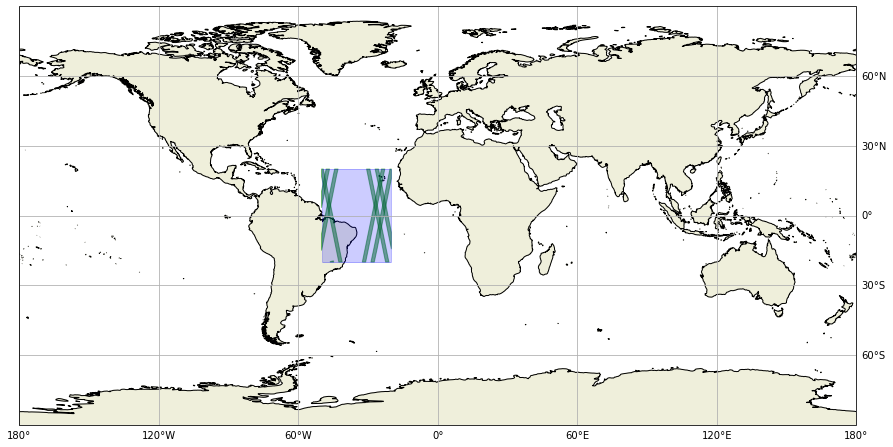

In [9]:
# display the location of found granules
eo_harvest.plot(res, clip=area)

## Advanced usage : multi-search
Let's search crossovers over a storm track for instance, e.g. a series of time and locations. The `multisearch` function allows to pass on the full list of time and locations, and harvest a consolidate result.

This step may takes a long time here, as we send a search request for each storm track time step (every hour), so more than 200 requests for the whole storm life time.

In [10]:
# first get a storm track from our storm track directory
import certoolbox.hurricanes

# identifier of the storm in ATCF convention
ATCF_NAME = 'wp202019'

# read the track
track = certoolbox.hurricanes.track(ATCF_NAME)

# transform into a list of time and search areas, using a colocation radius of 0.5 degrees (to ensure we are close to storm eye).
# The track is interpolated hourly for better precision and we will search within 30 minutes around each hourly track point.
targets = certoolbox.hurricanes.searchable_track(track, radius=3., interpolate='1H')

Run the multi-search (may take some time) and display result

In [11]:
res = eo_harvest.multisearch(
    'Ifremer',
    'argo',
    targets,
    delta_time=datetime.timedelta(minutes=1440),
    silent=True
)

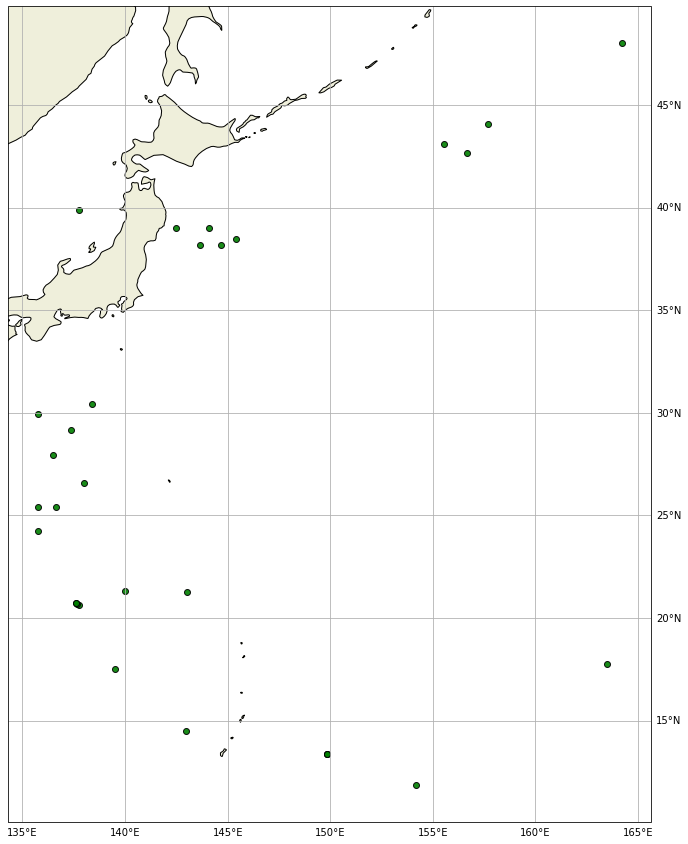

In [12]:
eo_harvest.plot(res)

Here we use asymetrical colocation criteria : 1 hour ahead of the hurricane track time and 3 hours after

In [13]:
res = eo_harvest.multisearch(
    'Ifremer',
    'argo',
    targets,
    delta_time=(datetime.timedelta(minutes=1440), datetime.timedelta(minutes=1440*3)),
    silent=True
)

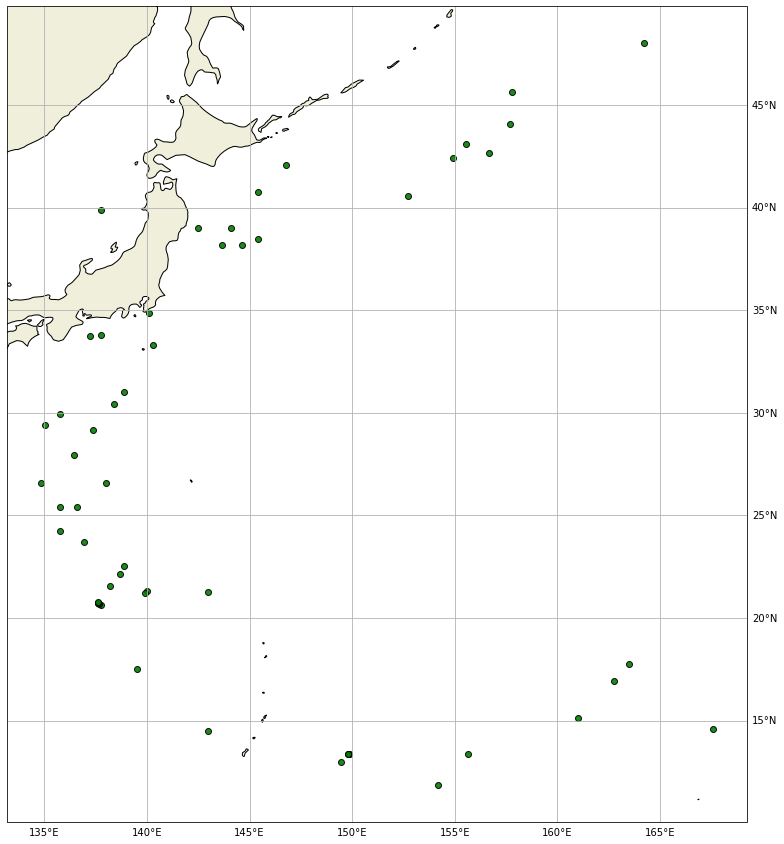

In [14]:
eo_harvest.plot(res)

In [15]:
# print the name and URL of found granules
for t, granules in res.items.items():
    if len(granules) > 0:
        for g in granules:
            print(g.name)

D5904912_178.nc
R5902221_359.nc
D5902512_111.nc
R5901388_446.nc
R5905733_050.nc
R5905674_044.nc
R2902759_001.nc
R2902759_002.nc
R2902759_004.nc
R2902759_003.nc
D5902513_111.nc
R2902759_005.nc
R5905860_017.nc
D2902725_151.nc
R5905061_176.nc
D2902719_138.nc
D2902726_113.nc
D2902726_114.nc
D2902726_117.nc
D2902726_115.nc
D2902726_116.nc
D2901524_212.nc
R2903334_059.nc
R2902747_052.nc
D2902719_139.nc
R2902533_172.nc
D2902726_118.nc
R2903378_015.nc
R2903332_060.nc
R2902532_178.nc
R2903326_063.nc
R2903365_033.nc
R2903366_033.nc
R2903367_029.nc
R2903336_054.nc
R2903377_015.nc
R2903000_134.nc
R2902754_099.nc
R2903372_021.nc
R2903376_016.nc
R2903341_042.nc
R2903336_055.nc
R2903381_005.nc
R2901753_166.nc
R2903380_005.nc
R2903379_005.nc
R2903224_067.nc
R2903345_043.nc
R2903374_024.nc
R2903373_025.nc
R2903375_024.nc
R2903363_036.nc
R2903354_177.nc
R5904741_118.nc
R2902997_148.nc
R2903395_039.nc
R2903210_175.nc
